# IRIS DATASET

In [154]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [155]:
iris = pd.read_csv('data.csv', sep=',')

In [156]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [157]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [158]:
iris[iris.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,setosa
37,4.9,3.1,1.5,0.1,setosa
142,5.8,2.7,5.1,1.9,virginica


In [159]:
iris["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## Exploratory Data Analysis

### Count

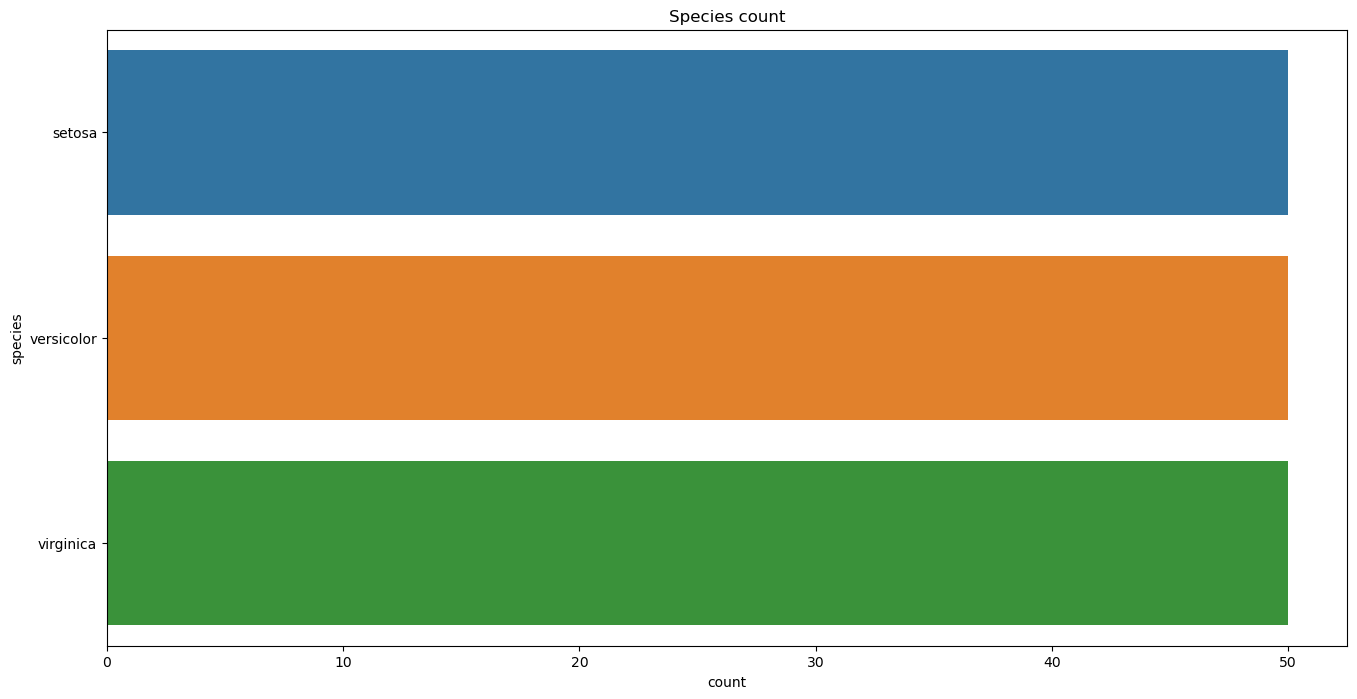

In [160]:
plt.figure(figsize=(16,8))
plt.title("Species count")
sns.countplot(data=iris, y="species", hue="species")
plt.show()

### Multiplot

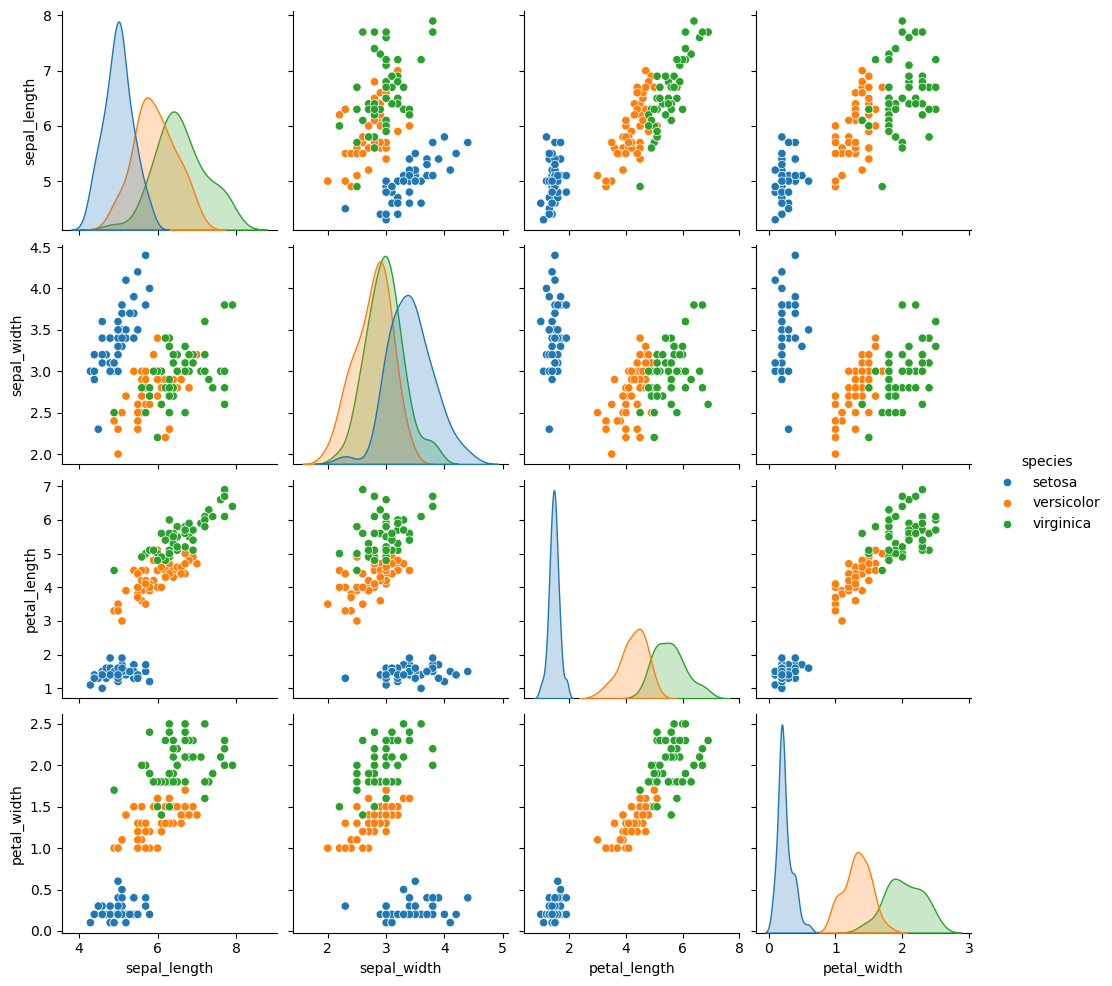

In [161]:
sns.pairplot(data=iris, hue="species")

### Correlation

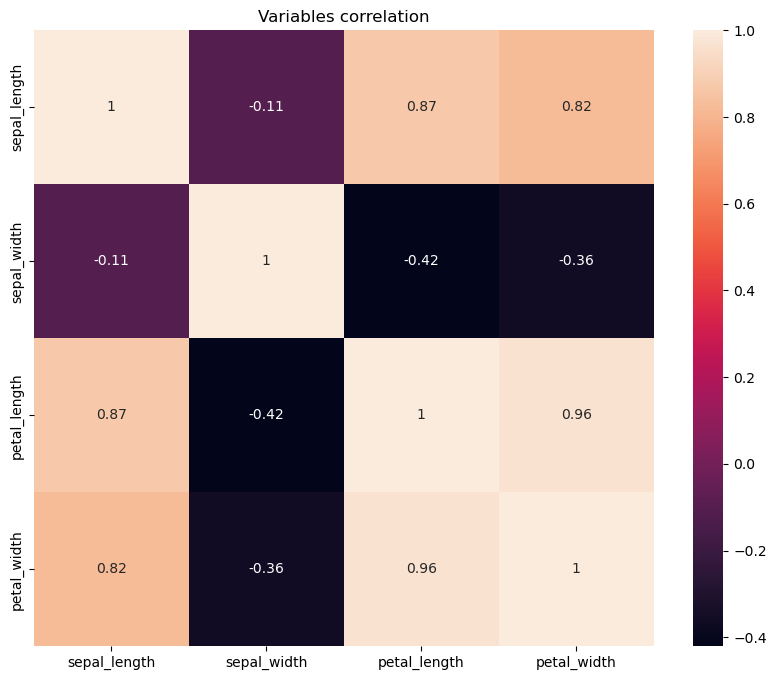

In [162]:
plt.figure(figsize=(10,8))
plt.title("Variables correlation")
sns.heatmap(data=iris.corr(numeric_only=True), annot=True)
plt.show()

### Boxplot

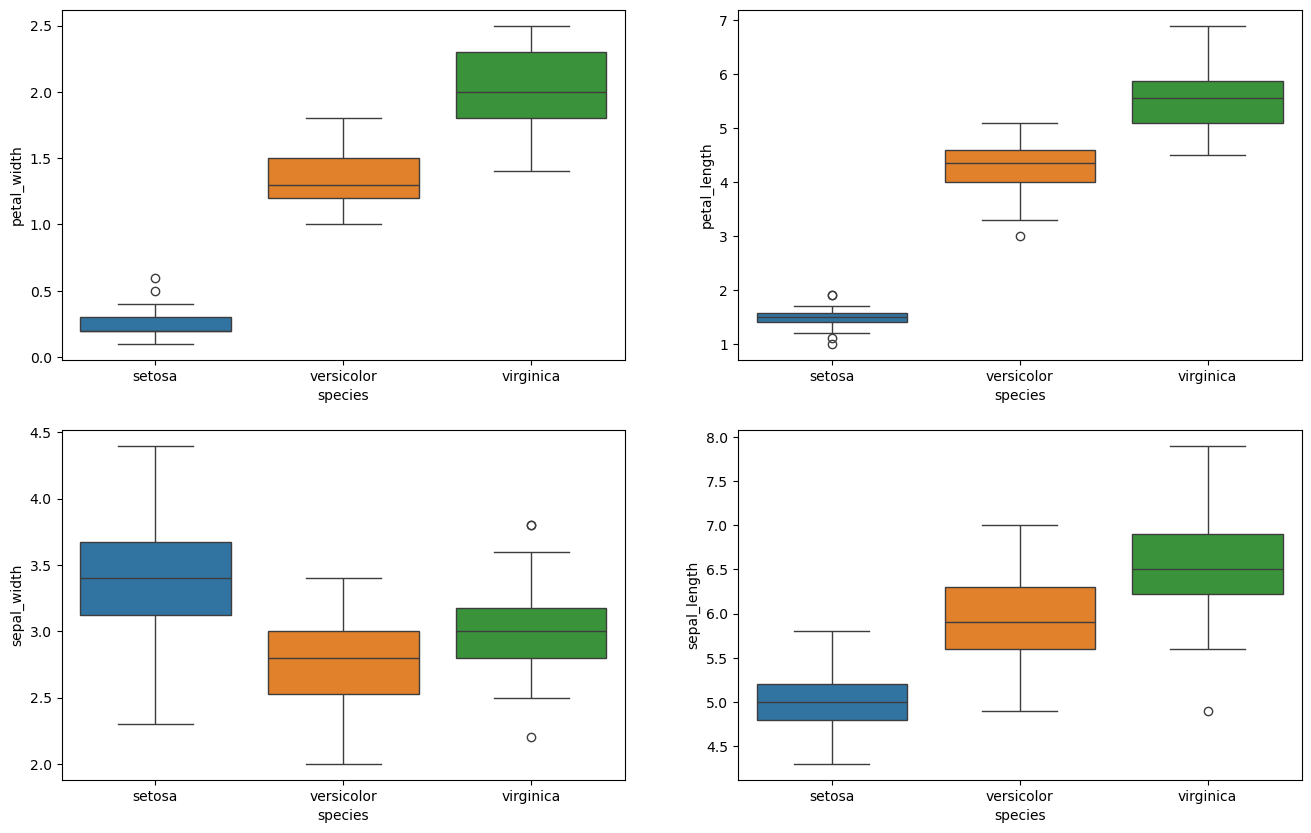

In [163]:
fig, axes = plt.subplots(2, 2, figsize=(16,10))
sns.boxplot(y="petal_width", x="species", data=iris, hue="species", orient='v', ax=axes[0, 0])
sns.boxplot(y="petal_length", x="species", data=iris, hue="species", orient='v', ax=axes[0, 1])
sns.boxplot(y="sepal_width", x="species", data=iris, hue="species", orient='v', ax=axes[1, 0])
sns.boxplot(y="sepal_length", x="species", data=iris, hue="species", orient='v', ax=axes[1, 1])
plt.show()

### Violin

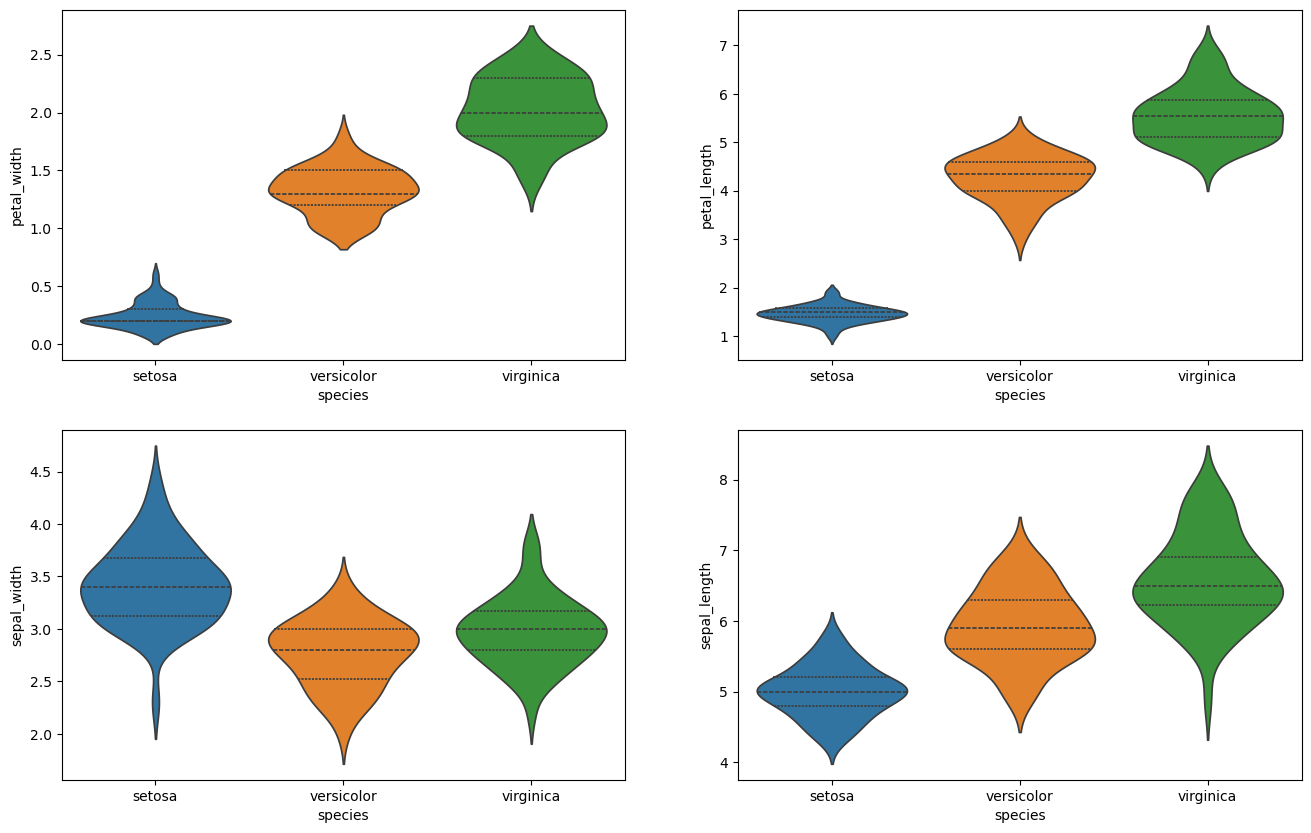

In [164]:
fig, axes = plt.subplots(2, 2, figsize=(16,10))
sns.violinplot(y="petal_width", x="species", data=iris, hue="species", orient='v', ax=axes[0, 0], inner='quartile')
sns.violinplot(y="petal_length", x="species", data=iris, hue="species", orient='v', ax=axes[0, 1], inner='quartile')
sns.violinplot(y="sepal_width", x="species", data=iris, hue="species", orient='v', ax=axes[1, 0], inner='quartile')
sns.violinplot(y="sepal_length", x="species", data=iris, hue="species", orient='v', ax=axes[1, 1], inner='quartile')
plt.show()

# ML


## Unsupervised Algorithms

### K-Means

In [208]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [209]:
iris_kmeans = iris.values[:, :-1] 

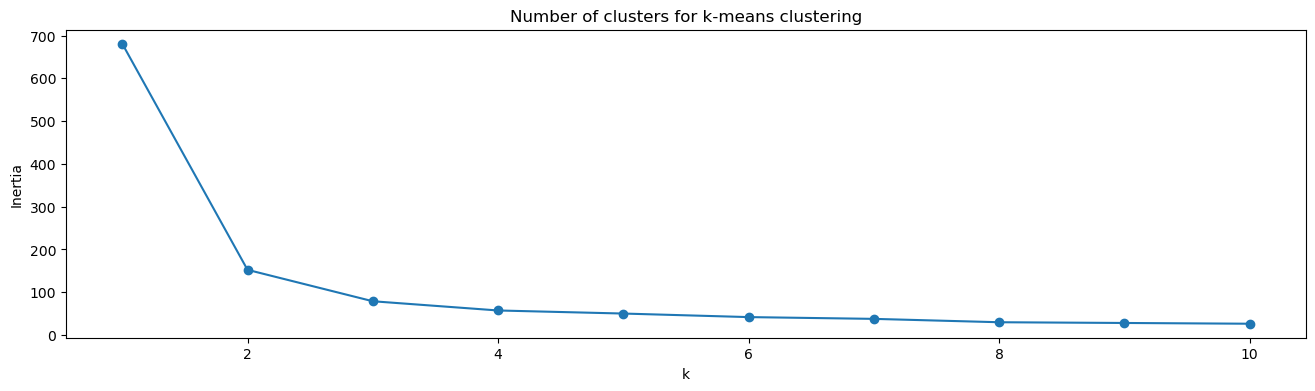

In [210]:
inertias = []
max_iter = 11

for i in range(1, max_iter):
    kmeans = KMeans(n_clusters=i, init="k-means++")
    kmeans.fit(iris_kmeans)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(16, 4))
plt.title("Number of clusters for k-means clustering")
plt.plot(range(1, max_iter), inertias, "-o")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()

In [211]:
kmeans = KMeans(n_clusters=3, init="k-means++")
kmeans.fit(iris_kmeans)
y_kmeans = kmeans.predict(iris_kmeans)

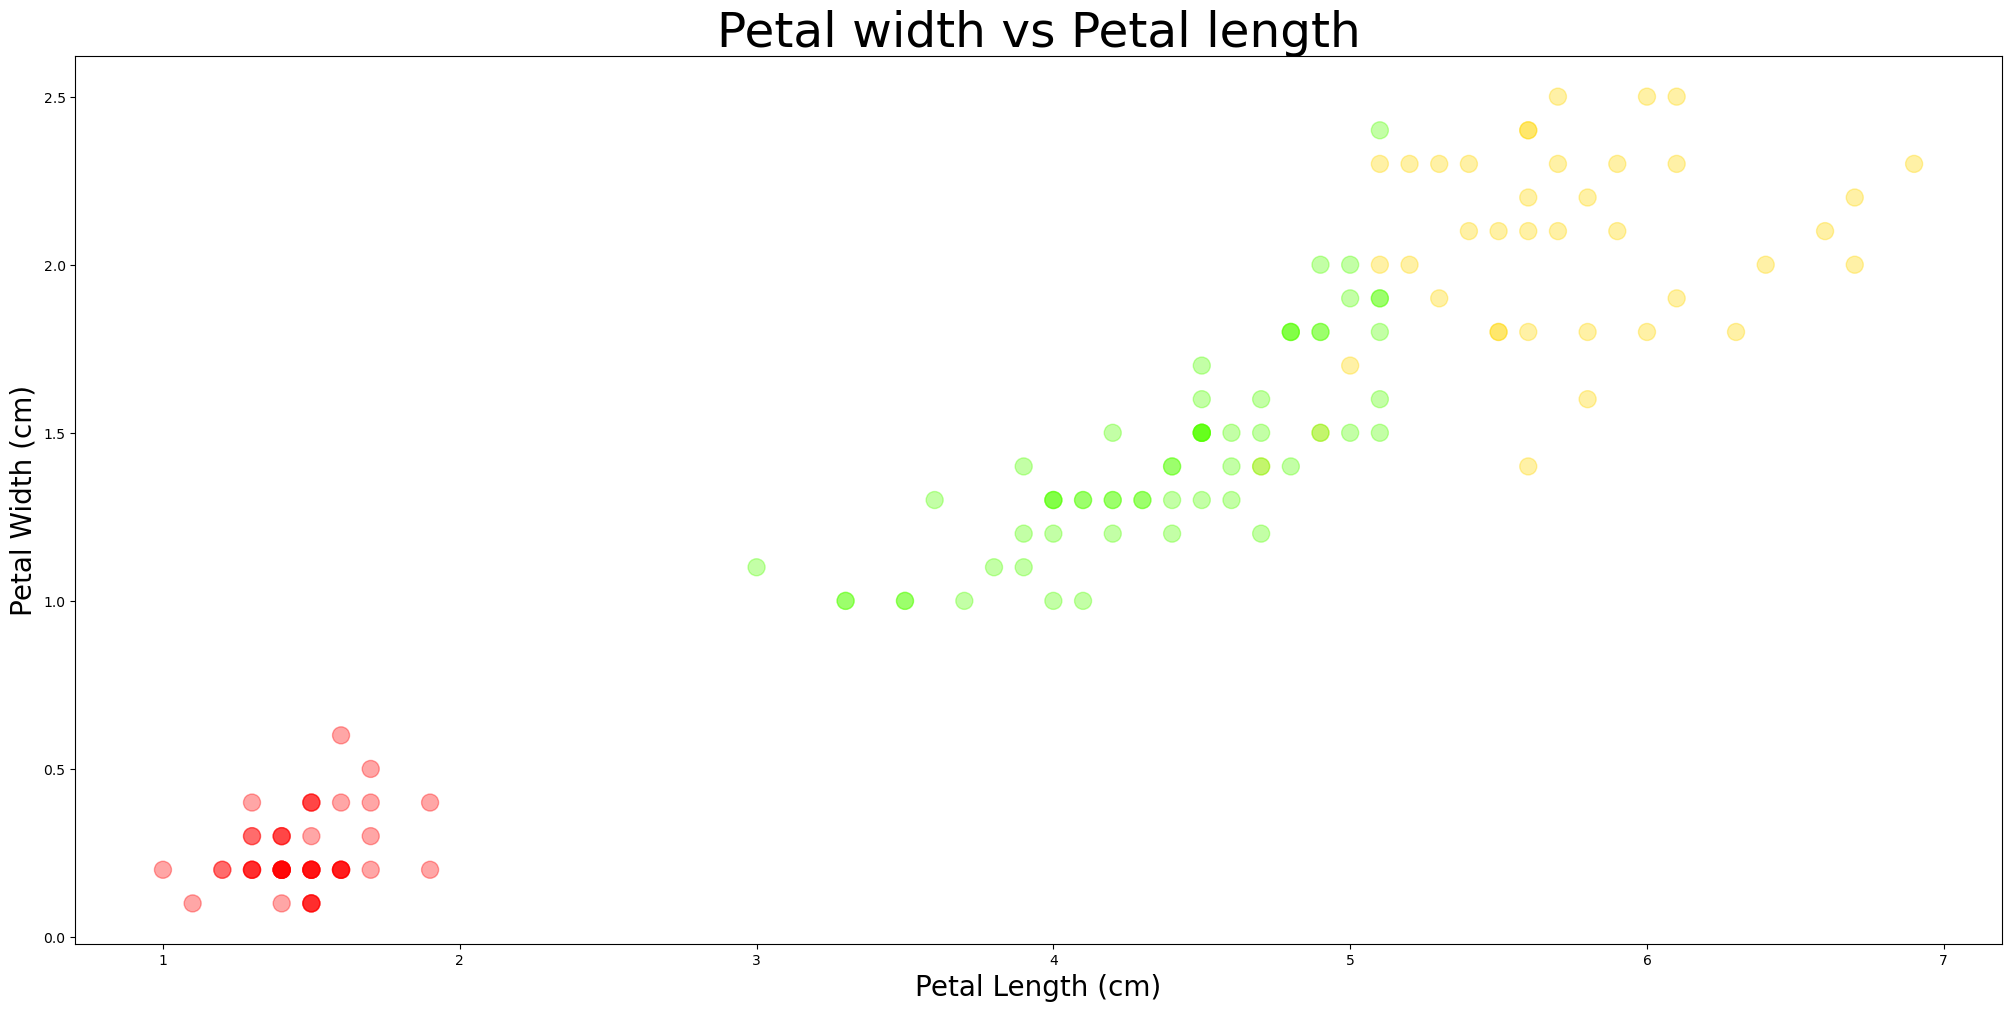

In [212]:
plt.figure(figsize=(20,10), layout="constrained")
plt.title("Petal width vs Petal length", fontsize=35)
plt.scatter(iris_kmeans[:,2], iris_kmeans[:,3], c=y_kmeans, cmap="prism", s=150, alpha=0.35)
plt.xlabel("Petal Length (cm)", fontsize=20)
plt.ylabel("Petal Width (cm)", fontsize=20)
plt.show()

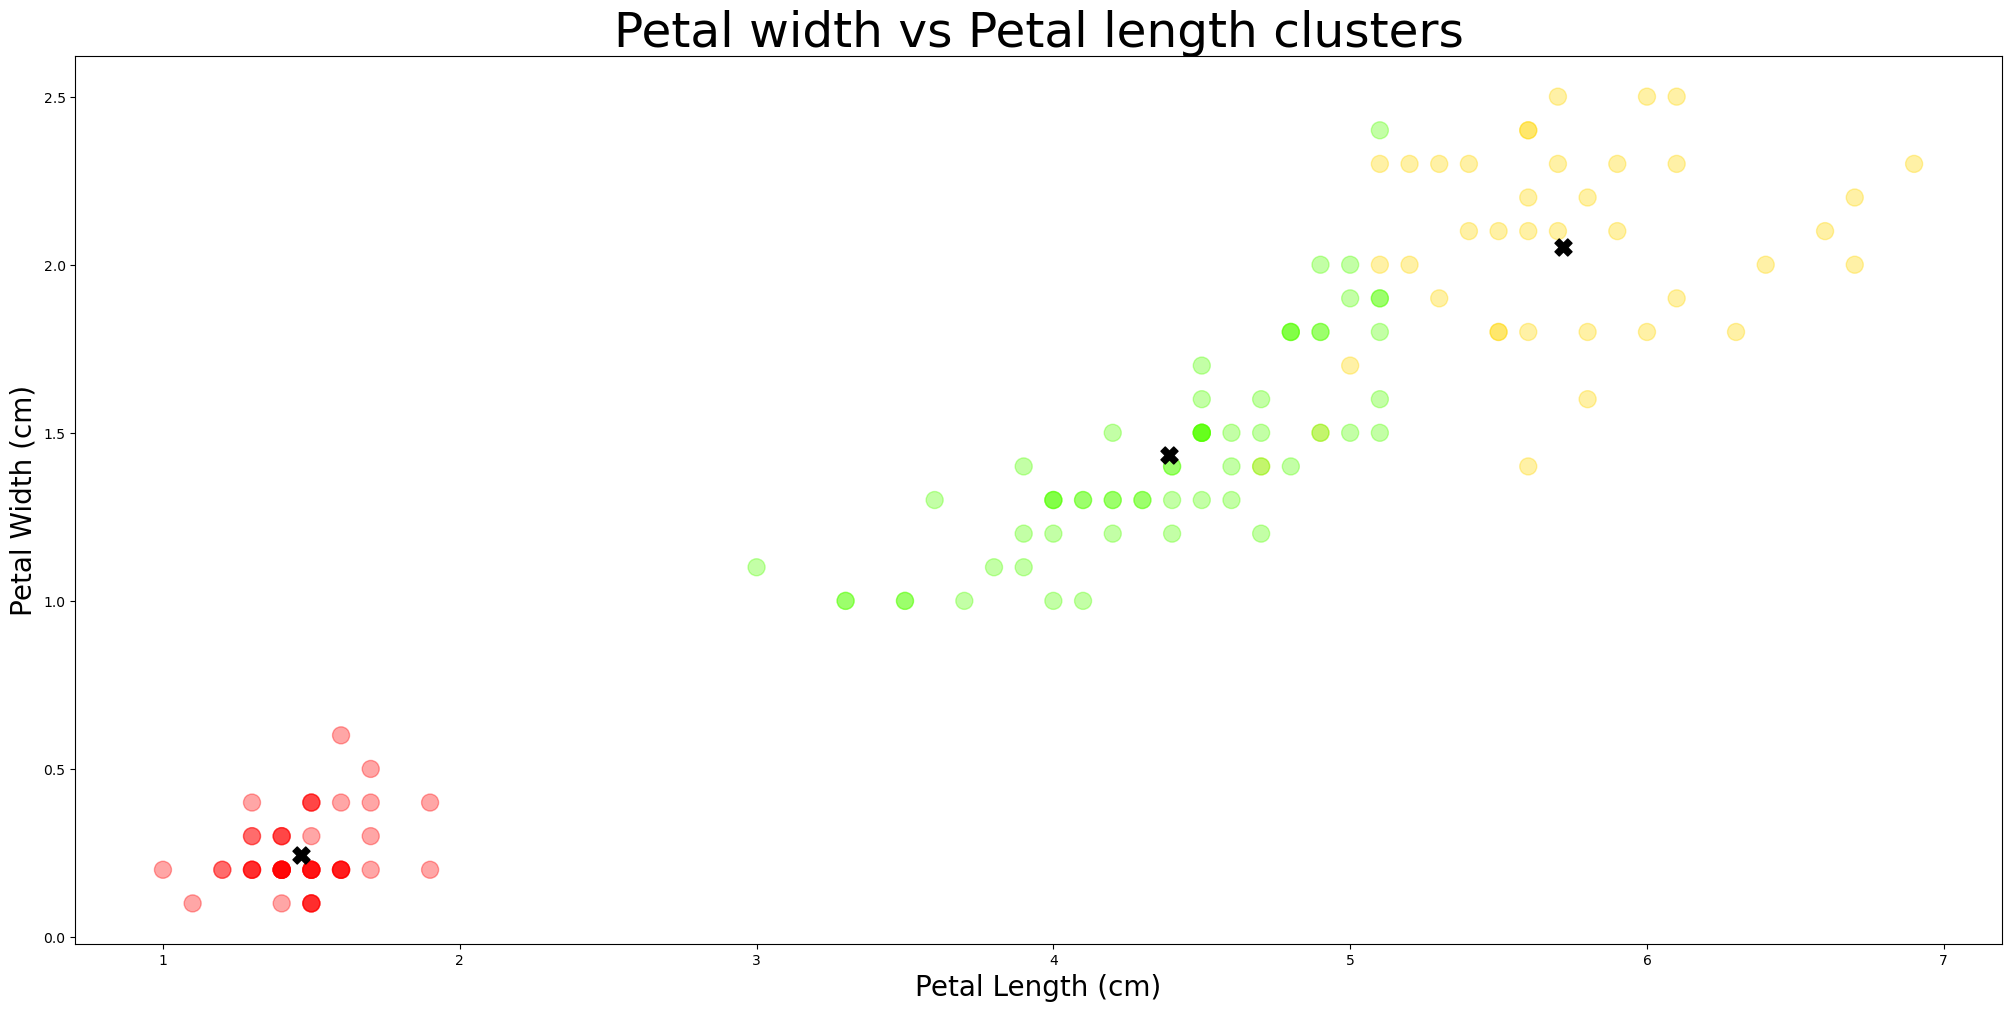

In [213]:
plt.figure(figsize=(20, 10), layout="constrained")
plt.title("Petal width vs Petal length clusters", fontsize=35)
plt.xlabel("Petal Length (cm)", fontsize=20)
plt.ylabel("Petal Width (cm)", fontsize=20)

plt.scatter(iris_kmeans[:,2], iris_kmeans[:,3], c=y_kmeans, cmap="prism", marker="o", alpha=0.35, s=150)
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], c="black", marker="X", s=150)


plt.show()

## Supervised Algorithms

In [214]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC	
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier

In [215]:
x_data = iris.values[:, :-1]
label_encoder = LabelEncoder() 
y_class = label_encoder.fit_transform(iris.values[:, -1])
class_names = label_encoder.classes_

x_train, x_test, y_train, y_test = train_test_split(x_data, y_class)

print("Training Set size:", x_train.shape)
print("Testing Set size:", x_test.shape)

Training Set size: (112, 4)
Testing Set size: (38, 4)


### Logistic Regression

In [216]:
logr = LogisticRegression()
logr.fit(x_train, y_train)
y_pred = logr.predict(x_test)

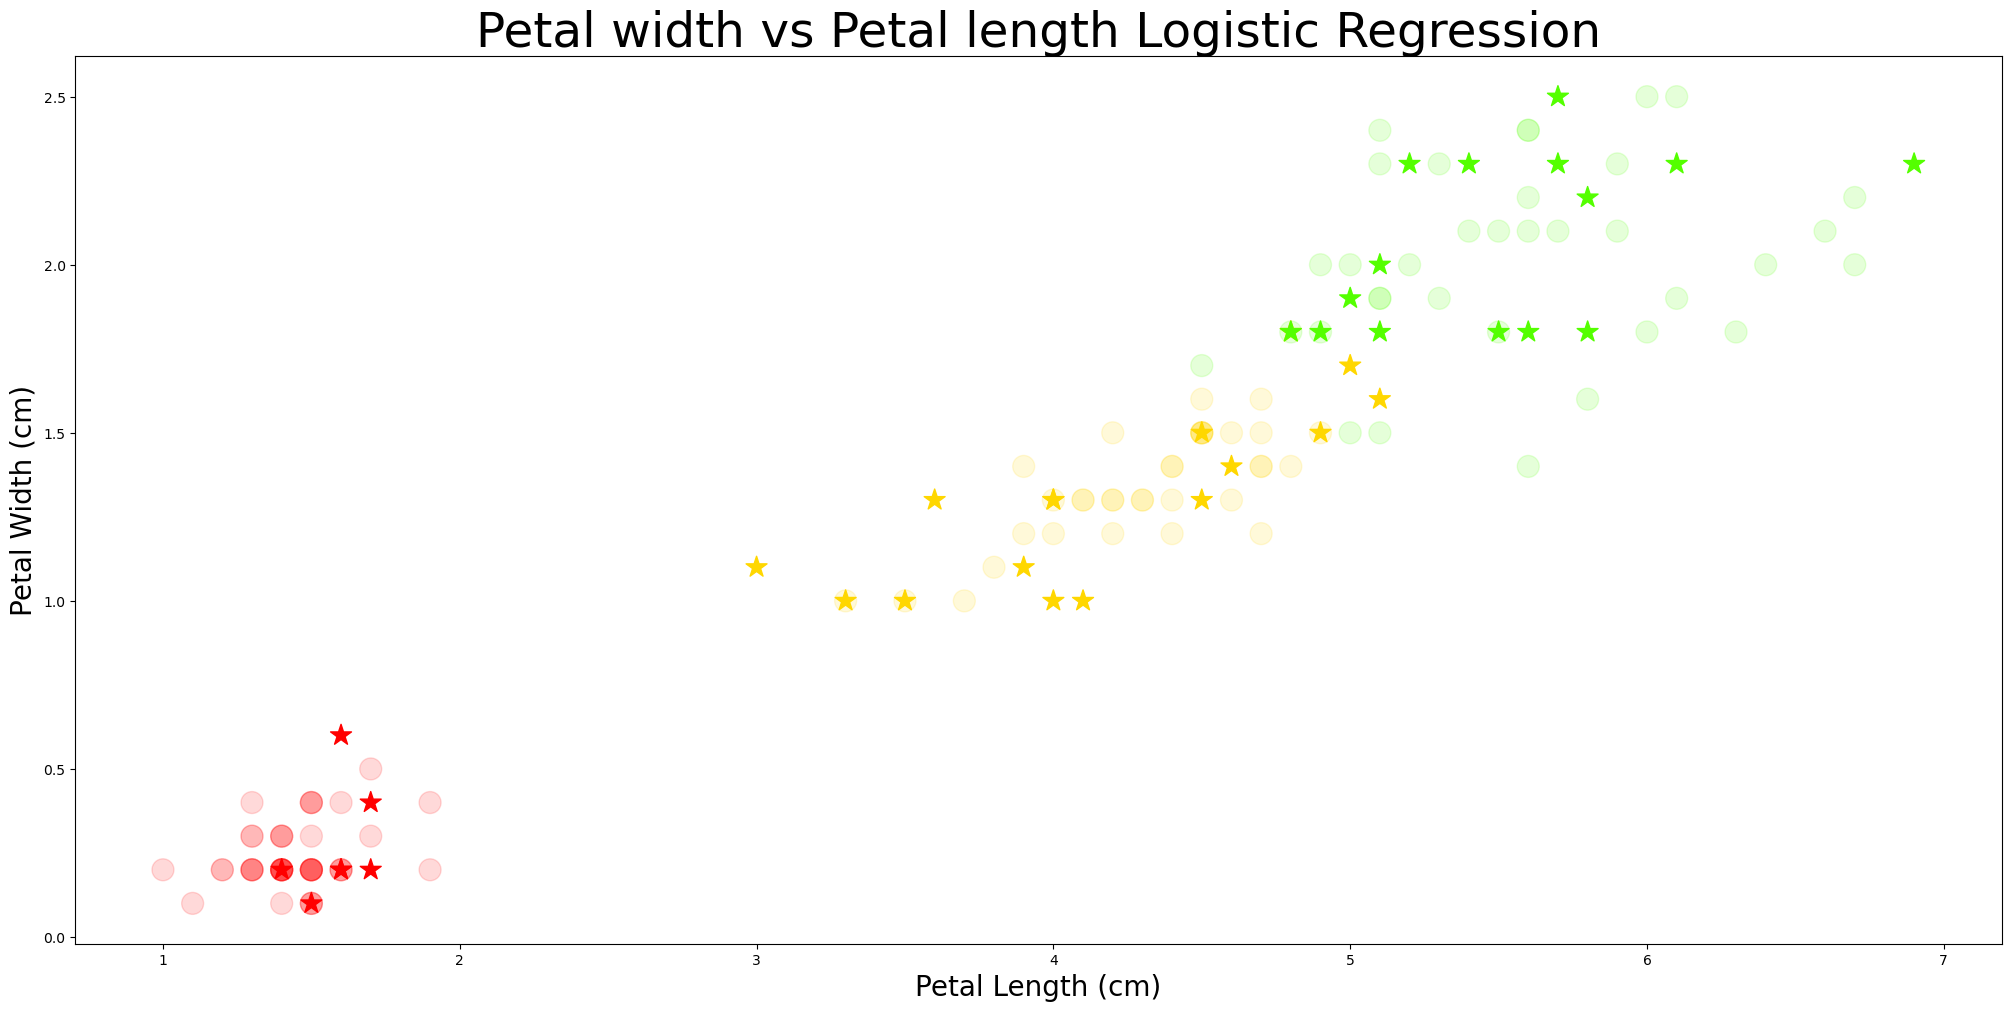

In [217]:
plt.figure(figsize=(20, 10), layout="constrained")
plt.title("Petal width vs Petal length Logistic Regression", fontsize=35)
plt.xlabel("Petal Length (cm)", fontsize=20)
plt.ylabel("Petal Width (cm)", fontsize=20)

plt.scatter(x_train[:,2], x_train[:,3], c=y_train, cmap="prism", marker="o", alpha=0.15, s=250)
plt.scatter(x_test[:,2], x_test[:,3], c=y_test, cmap="prism", marker="*", s=250)

plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.81      0.90        16
           2       0.83      1.00      0.91        15

    accuracy                           0.92        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.93      0.92      0.92        38



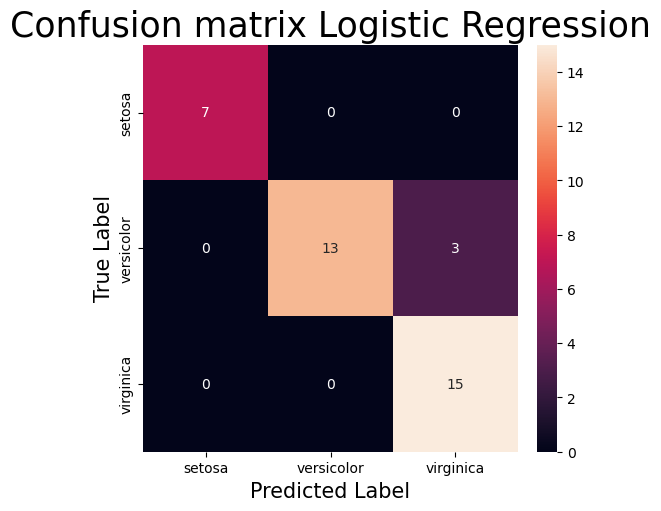

In [218]:
print(classification_report(y_test, y_pred))

plt.figure(figsize=(5,5), layout="constrained")
plt.title("Confusion matrix Logistic Regression", fontsize=25)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label", fontsize=15)
plt.ylabel("True Label", fontsize=15)
plt.show()

### KNN

In [219]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

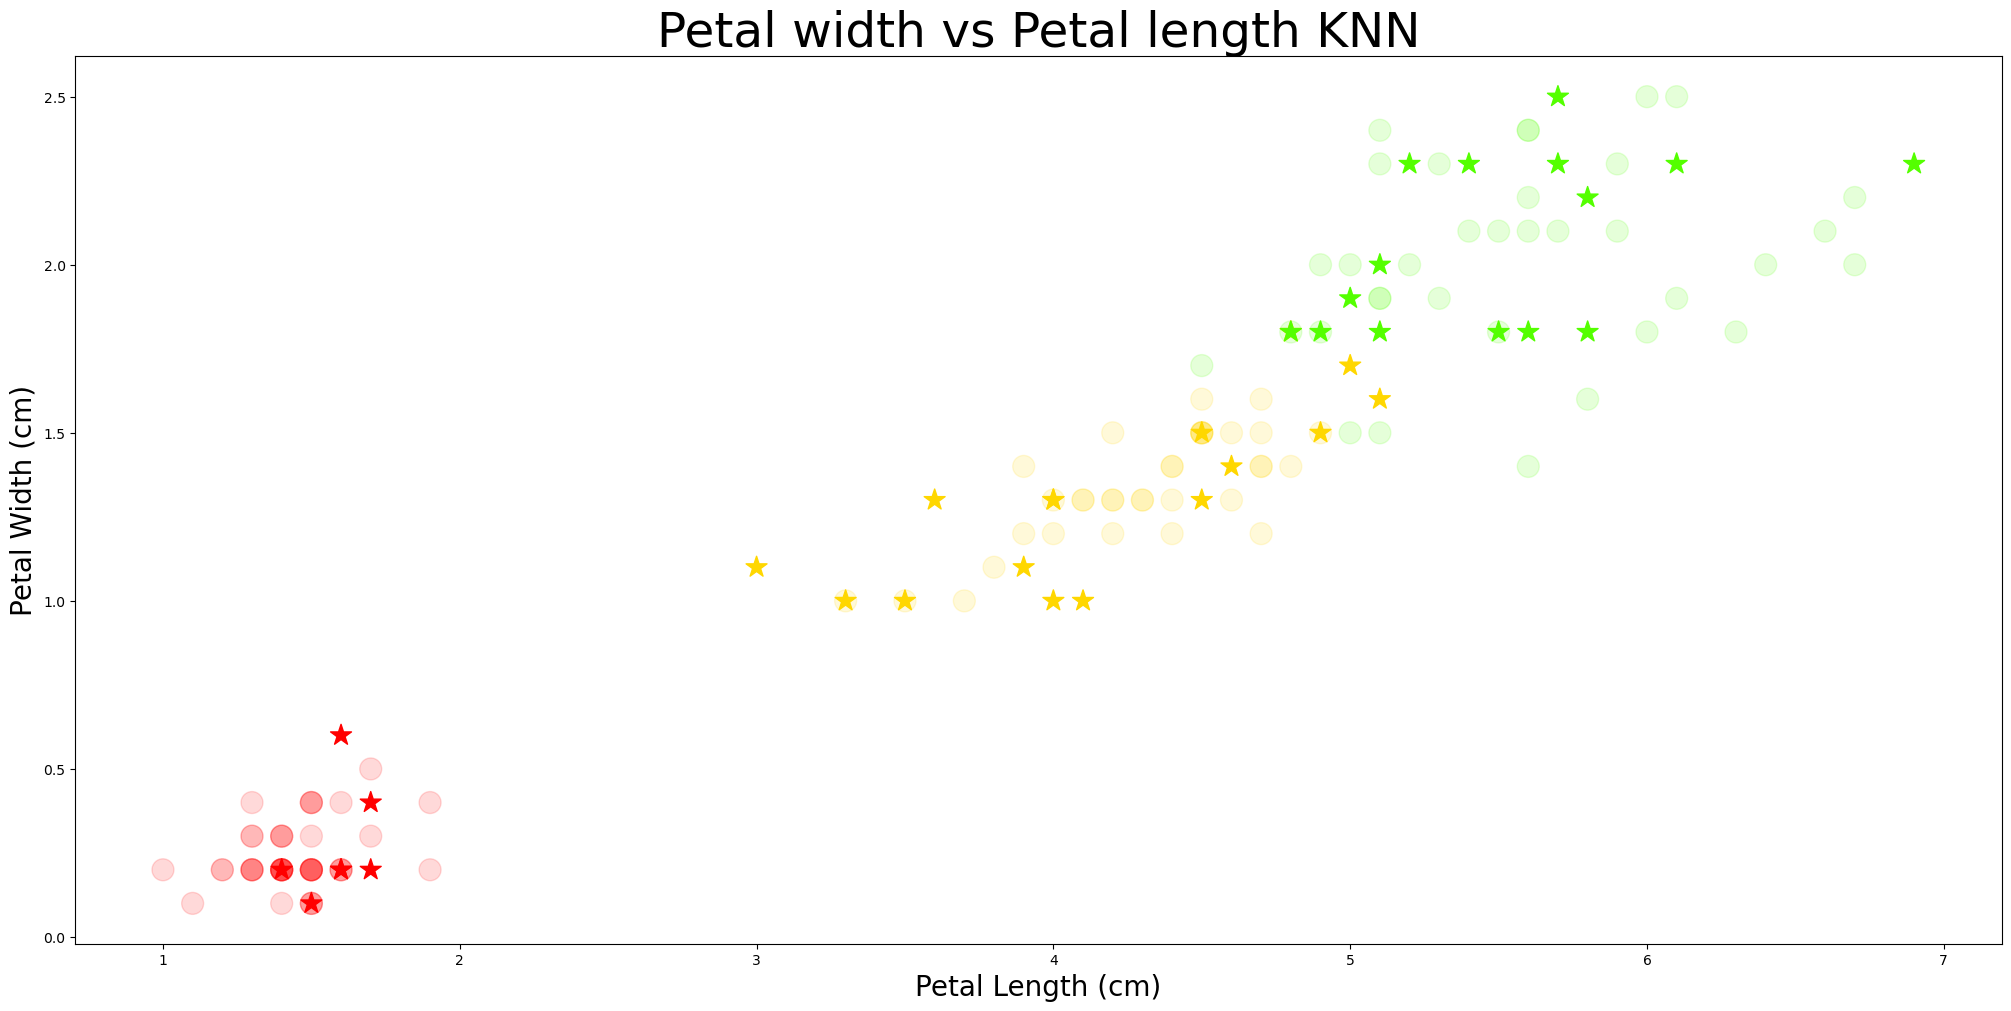

In [220]:
plt.figure(figsize=(20, 10), layout="constrained")
plt.title("Petal width vs Petal length KNN", fontsize=35)
plt.xlabel("Petal Length (cm)", fontsize=20)
plt.ylabel("Petal Width (cm)", fontsize=20)

plt.scatter(x_train[:,2], x_train[:,3], c=y_train, cmap="prism", marker="o", alpha=0.15, s=250)
plt.scatter(x_test[:,2], x_test[:,3], c=y_test, cmap="prism", marker="*", s=250)

plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        15

    accuracy                           0.95        38
   macro avg       0.96      0.96      0.96        38
weighted avg       0.95      0.95      0.95        38



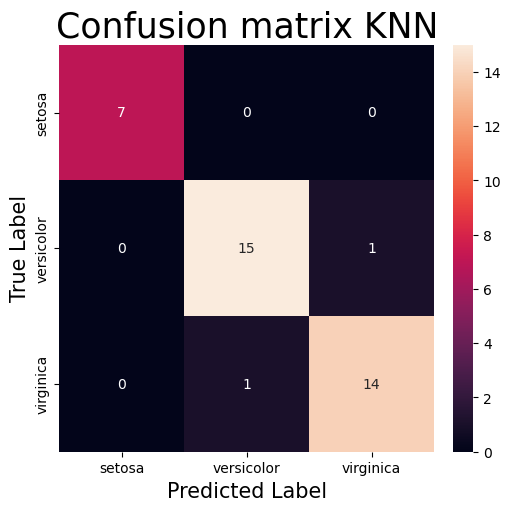

In [221]:
print(classification_report(y_test, y_pred))

plt.figure(figsize=(5,5), layout="constrained")
plt.title("Confusion matrix KNN", fontsize=25)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label", fontsize=15)
plt.ylabel("True Label", fontsize=15)
plt.show()

### Decision Tree

In [222]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)

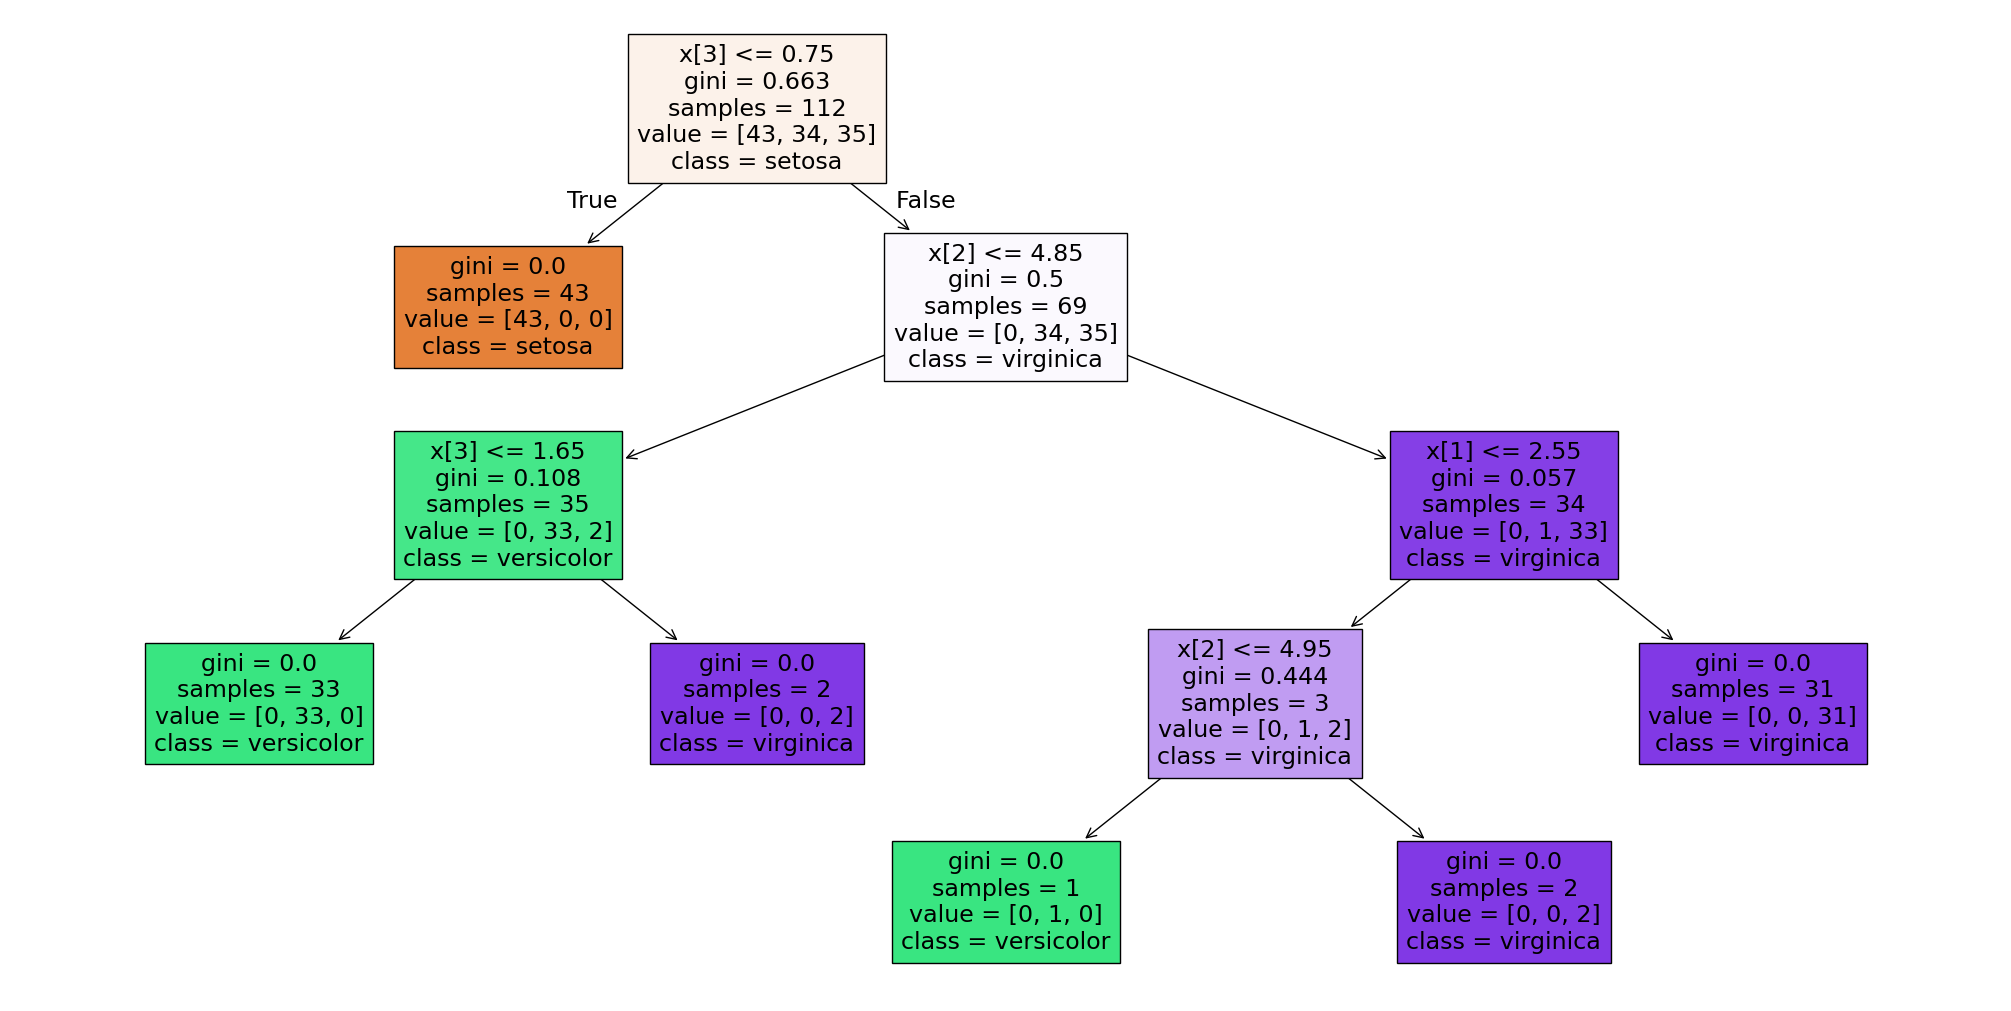

In [223]:
plt.figure(figsize=(20, 10), layout="constrained")
tree_plot = plot_tree(tree, filled=True, impurity=True, class_names=class_names)
plt.show()

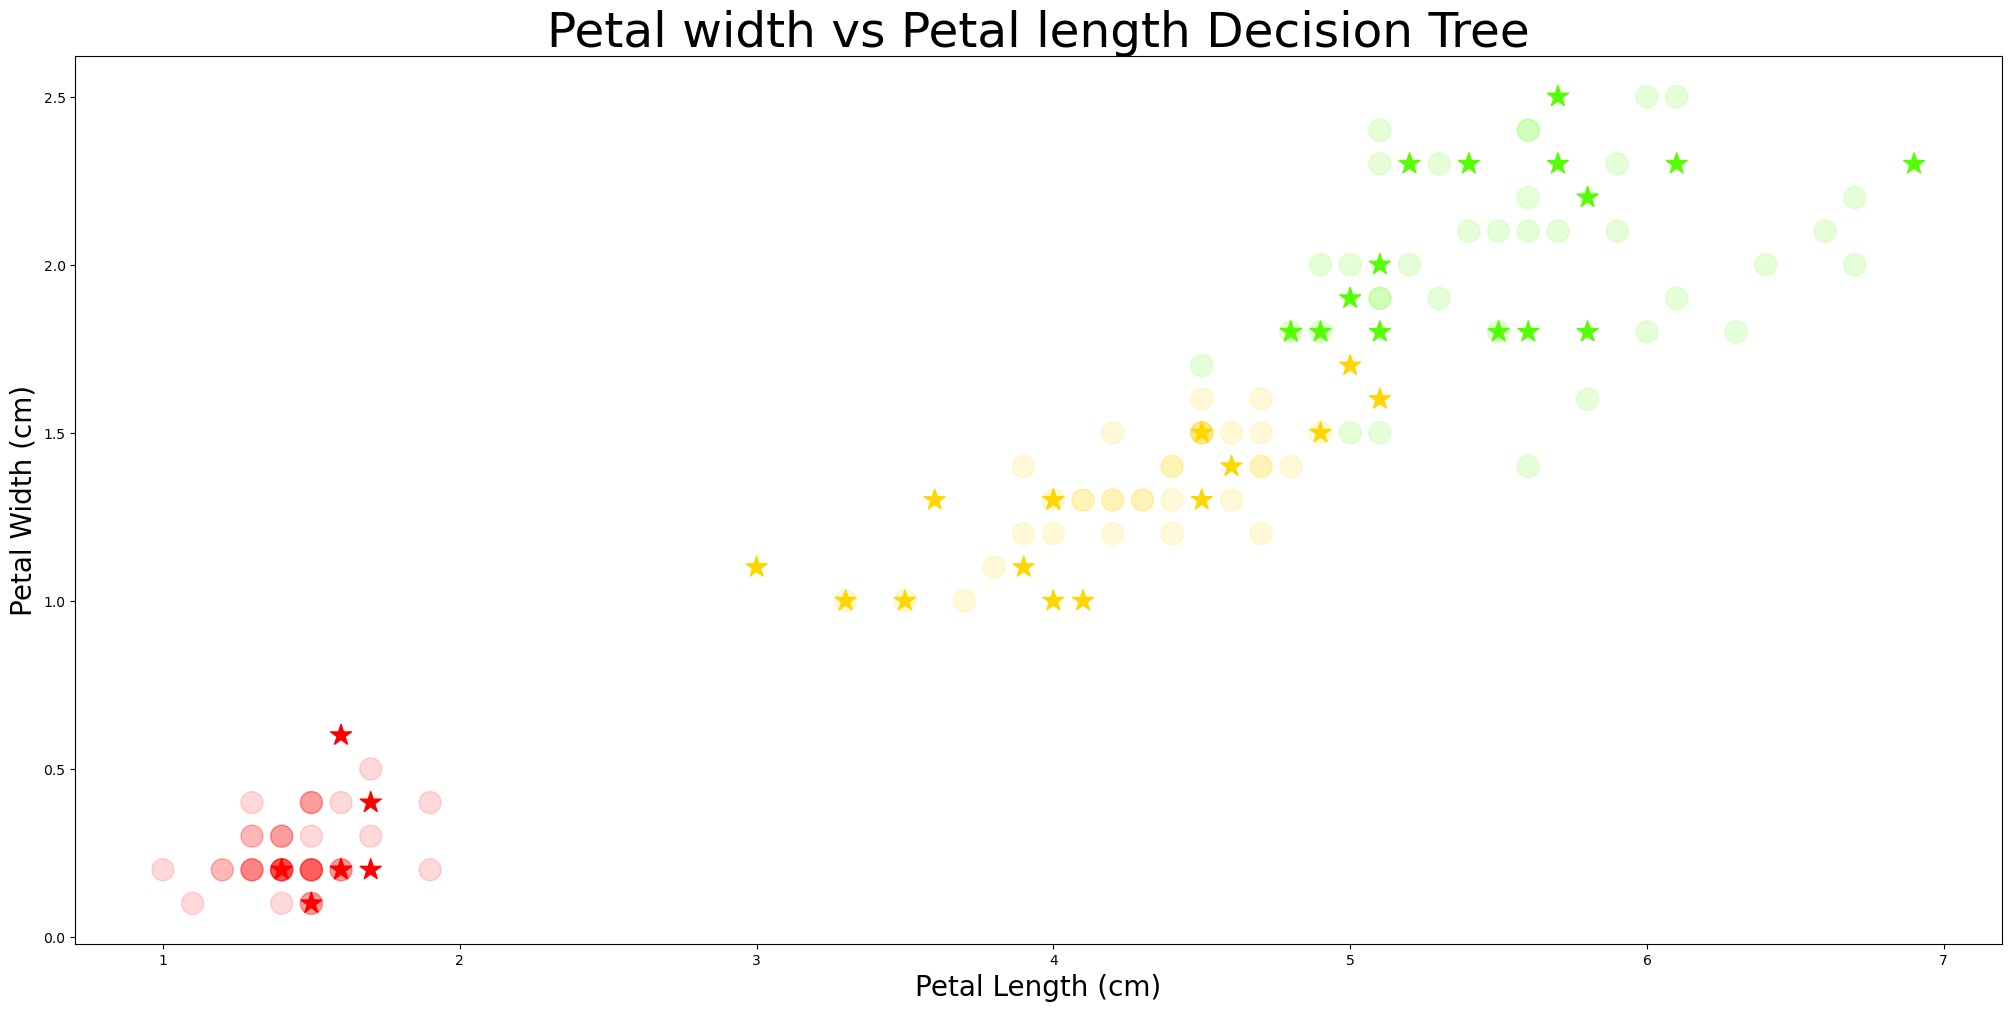

In [224]:
plt.figure(figsize=(20, 10), layout="constrained")
plt.title("Petal width vs Petal length Decision Tree", fontsize=35)
plt.xlabel("Petal Length (cm)", fontsize=20)
plt.ylabel("Petal Width (cm)", fontsize=20)

plt.scatter(x_train[:,2], x_train[:,3], c=y_train, cmap="prism", marker="o", alpha=0.15, s=250)
plt.scatter(x_test[:,2], x_test[:,3], c=y_test, cmap="prism", marker="*", s=250)

plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.75      0.86        16
           2       0.79      1.00      0.88        15

    accuracy                           0.89        38
   macro avg       0.93      0.92      0.91        38
weighted avg       0.92      0.89      0.89        38



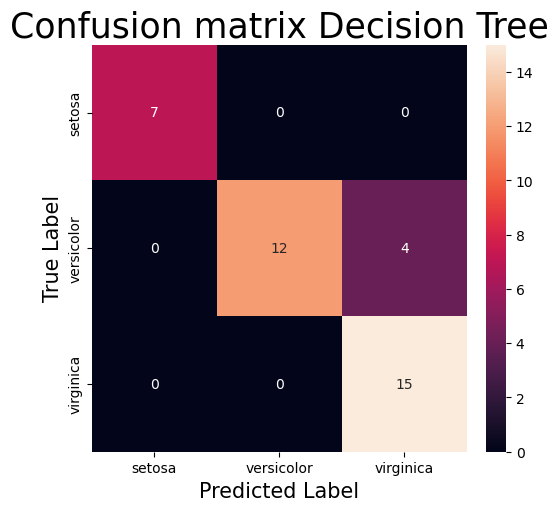

In [225]:
print(classification_report(y_test, y_pred))

plt.figure(figsize=(5,5), layout="constrained")
plt.title("Confusion matrix Decision Tree", fontsize=25)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label", fontsize=15)
plt.ylabel("True Label", fontsize=15)
plt.show()

### SVM

In [226]:
x_train_ovo = x_train.copy()
y_train_ovo = y_train.copy()
x_test_ovo = x_test.copy()
y_test_ovo = y_test.copy()

svm_ovo = SVC(decision_function_shape="ovo")
svm_ovo.fit(x_train_ovo, y_train_ovo)
y_pred_ovo = svm_ovo.predict(x_test_ovo)

svm_ovr = SVC(decision_function_shape="ovr")
svm_ovr.fit(x_train, y_train)
y_pred_ovr = svm_ovr.predict(x_test)

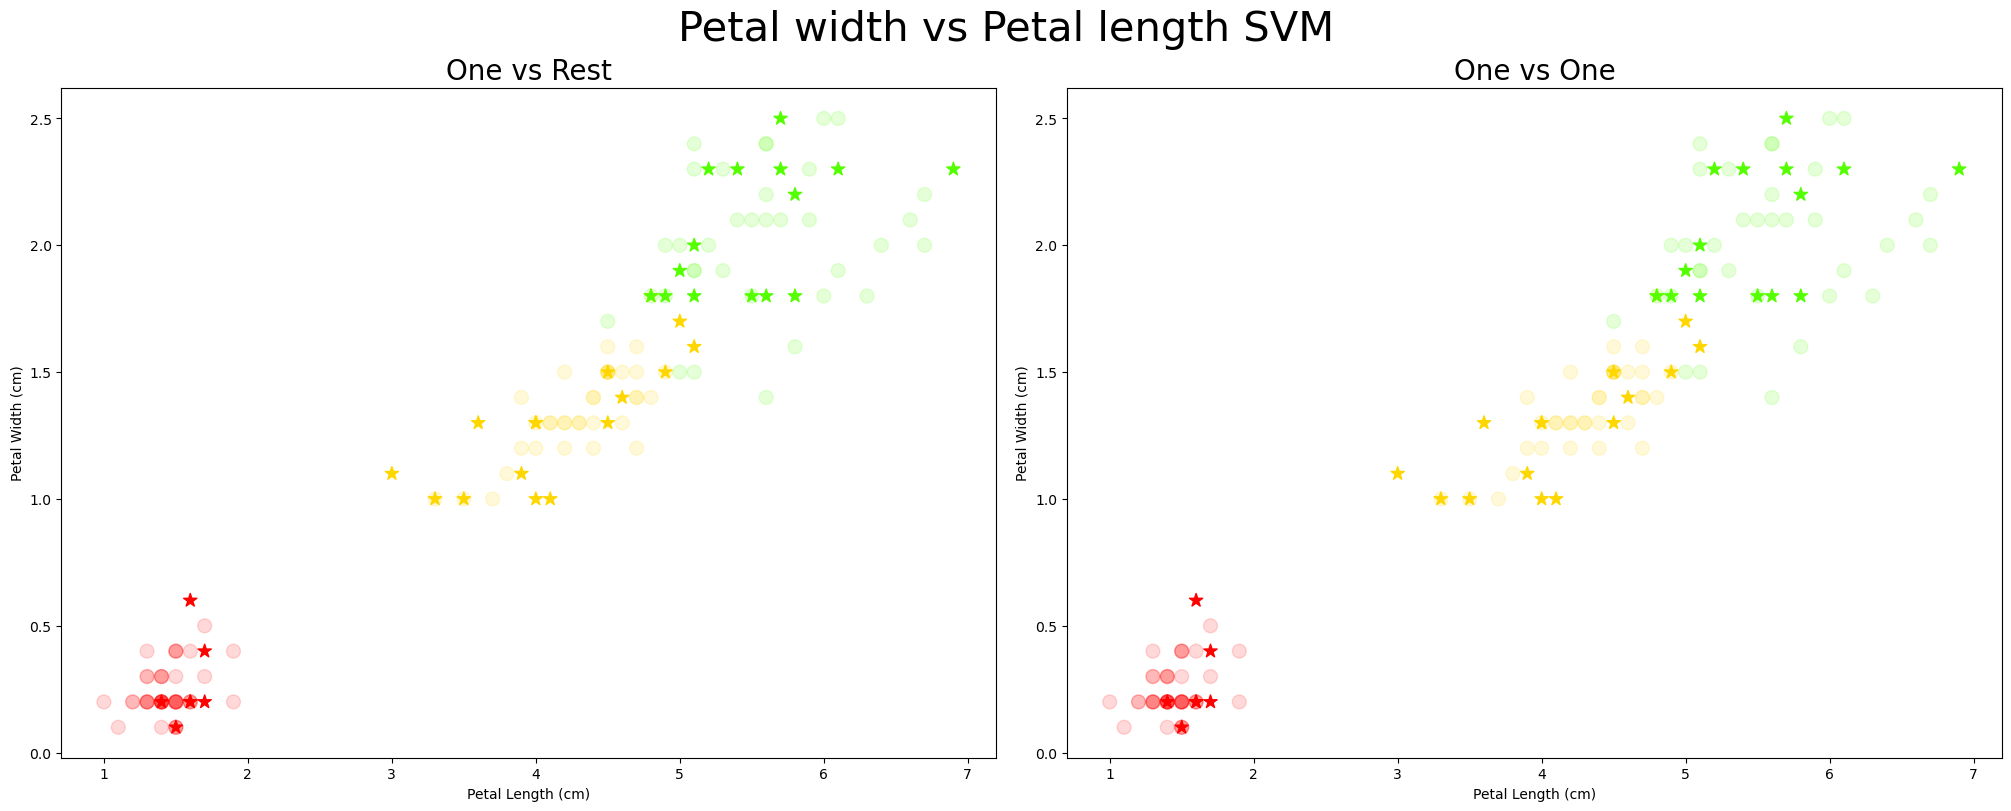

In [227]:
fig, axes = plt.subplots(1, 2, figsize=(20,8), layout="constrained")

fig.suptitle("Petal width vs Petal length SVM", fontsize=30)

axes[0].set_title("One vs Rest", fontsize=20)
axes[0].set_xlabel("Petal Length (cm)", fontsize=10)
axes[0].set_ylabel("Petal Width (cm)", fontsize=10)
axes[0].scatter(x_train[:,2], x_train[:,3], c=y_train, cmap="prism", marker="o", alpha=0.15, s=100)
axes[0].scatter(x_test[:,2], x_test[:,3], c=y_test, cmap="prism", marker="*", s=100)

axes[1].set_title("One vs One", fontsize=20)
axes[1].set_xlabel("Petal Length (cm)", fontsize=10)
axes[1].set_ylabel("Petal Width (cm)", fontsize=10)
axes[1].scatter(x_train_ovo[:,2], x_train_ovo[:,3], c=y_train_ovo, cmap="prism", marker="o", alpha=0.15, s=100)
axes[1].scatter(x_test_ovo[:,2], x_test_ovo[:,3], c=y_test_ovo, cmap="prism", marker="*", s=100)

plt.show()

OVR:               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.88      0.93        16
           2       0.88      1.00      0.94        15

    accuracy                           0.95        38
   macro avg       0.96      0.96      0.96        38
weighted avg       0.95      0.95      0.95        38

OVO:               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.88      0.93        16
           2       0.88      1.00      0.94        15

    accuracy                           0.95        38
   macro avg       0.96      0.96      0.96        38
weighted avg       0.95      0.95      0.95        38



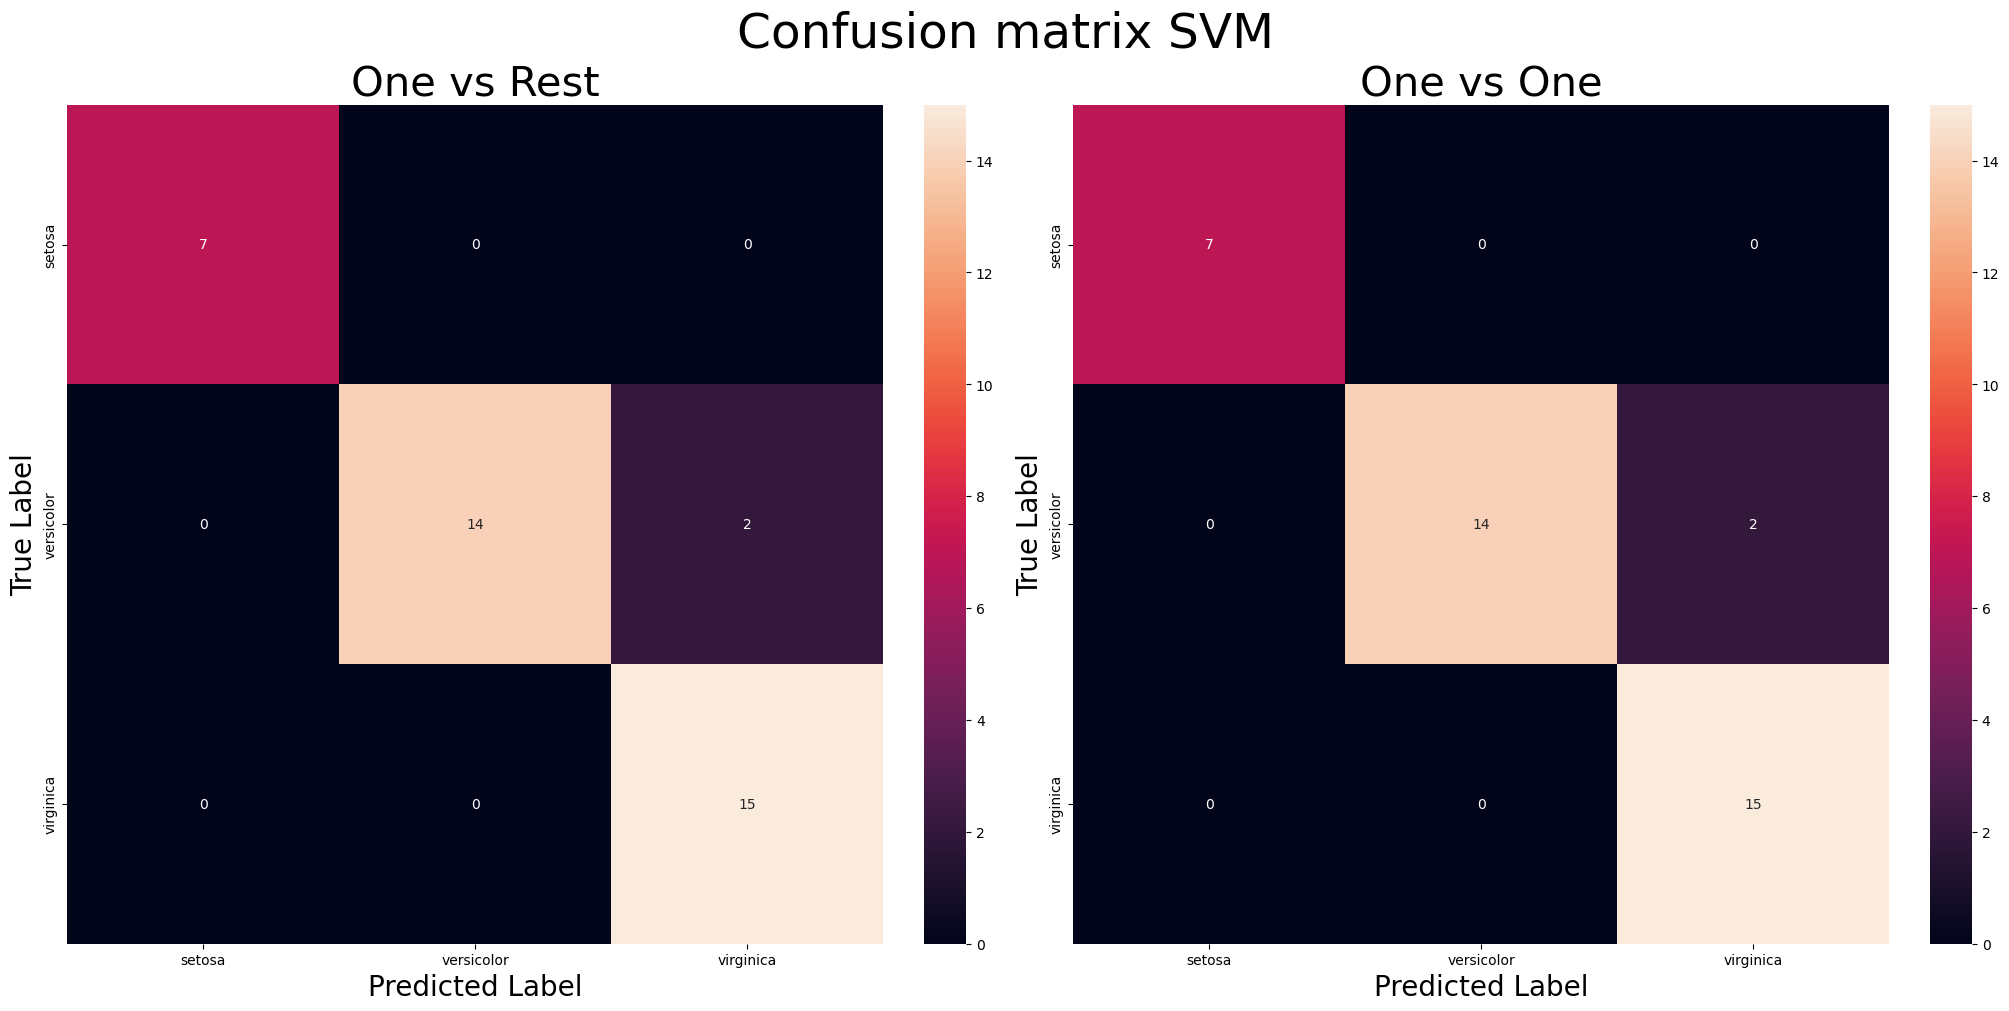

In [228]:
print(f"OVR: {classification_report(y_test, y_pred_ovr)}")
print(f"OVO: {classification_report(y_test, y_pred_ovo)}")

fig, axes = plt.subplots(1, 2, figsize=(20,10), layout="constrained")

fig.suptitle("Confusion matrix SVM", fontsize=35)

sns.heatmap(confusion_matrix(y_test, y_pred_ovr), annot = True, xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title("One vs Rest", fontsize=30)
axes[0].set_xlabel("Predicted Label", fontsize=20)
axes[0].set_ylabel("True Label", fontsize=20)


sns.heatmap(confusion_matrix(y_test_ovo, y_pred_ovo), annot = True, xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_title("One vs One", fontsize=30)
axes[1].set_xlabel("Predicted Label", fontsize=20)
axes[1].set_ylabel("True Label", fontsize=20)

plt.show()

### Random Forest

In [229]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

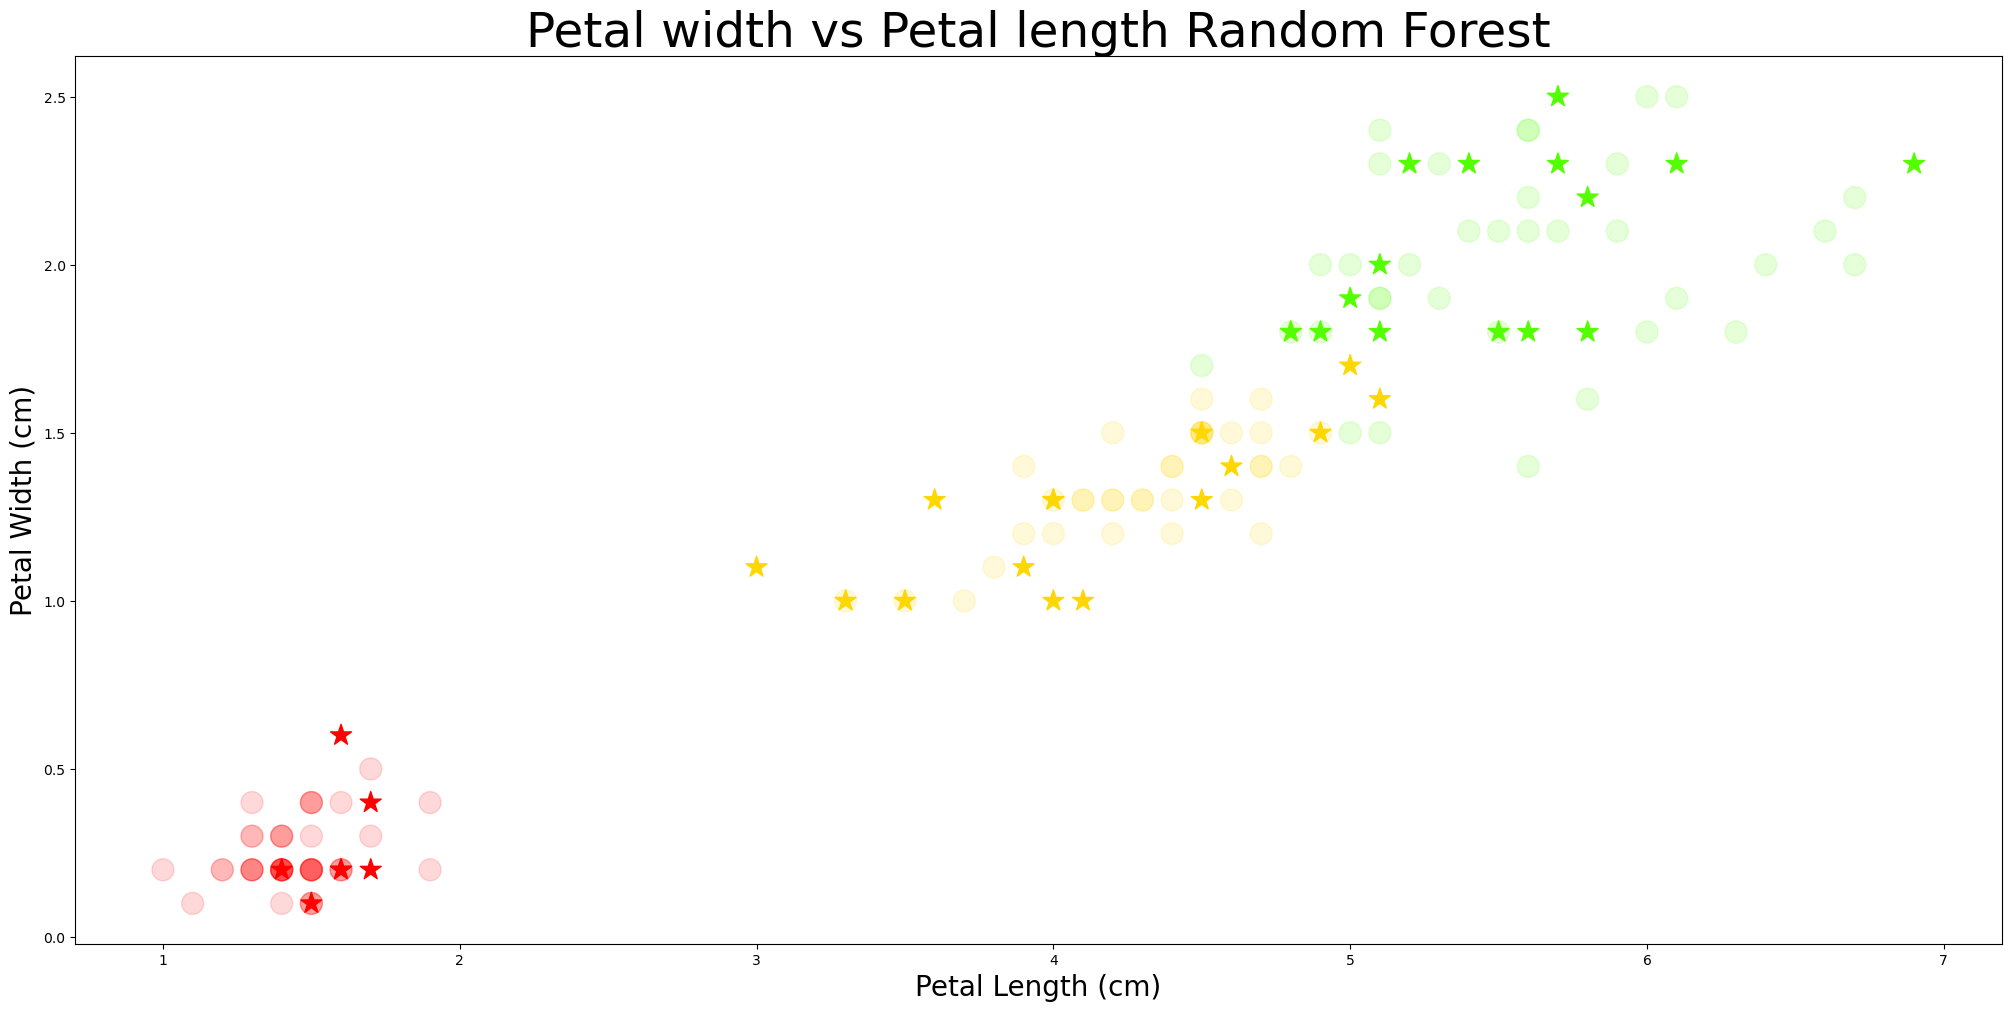

In [230]:
plt.figure(figsize=(20, 10), layout="constrained")
plt.title("Petal width vs Petal length Random Forest", fontsize=35)
plt.xlabel("Petal Length (cm)", fontsize=20)
plt.ylabel("Petal Width (cm)", fontsize=20)

plt.scatter(x_train[:,2], x_train[:,3], c=y_train, cmap="prism", marker="o", alpha=0.15, s=250)
plt.scatter(x_test[:,2], x_test[:,3], c=y_test, cmap="prism", marker="*", s=250)

plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.81      0.90        16
           2       0.83      1.00      0.91        15

    accuracy                           0.92        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.93      0.92      0.92        38



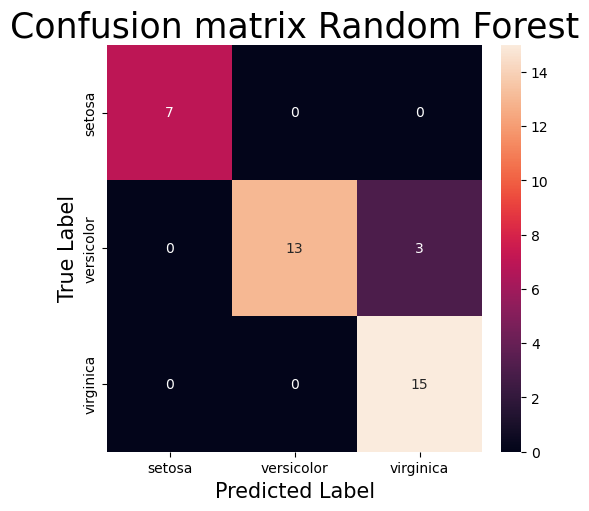

In [231]:
print(classification_report(y_test, y_pred))

plt.figure(figsize=(5,5), layout="constrained")
plt.title("Confusion matrix Random Forest", fontsize=25)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label", fontsize=15)
plt.ylabel("True Label", fontsize=15)
plt.show()

## XGBoost

## PCA

## t-SNE

## DBSCAN

## GMM